In [1]:
# 3 Trends

In [12]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sns
import tweepy
import numpy as np

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import access_token, consumer_key, consumer_secret, access_token_secret 

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of news outlets BBC, CBS, CNN, Fox, and New York Times
# Target Account
target_user = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments
bbc_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        bbc_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


In [5]:
# Convert sentiments to DataFrame
bbc_sentiments_df = pd.DataFrame(sentiments)
bbc_sentiments_df.head()
# Could convert date using date time library

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Wed Mar 28 13:32:04 +0000 2018,1.000,0.000,0.0,1
1,-0.3182,Wed Mar 28 12:26:01 +0000 2018,0.887,0.113,0.0,2
2,0.0000,Wed Mar 28 11:50:54 +0000 2018,1.000,0.000,0.0,3
3,0.0000,Wed Mar 28 11:49:07 +0000 2018,1.000,0.000,0.0,4
4,0.0000,Wed Mar 28 11:47:35 +0000 2018,1.000,0.000,0.0,5


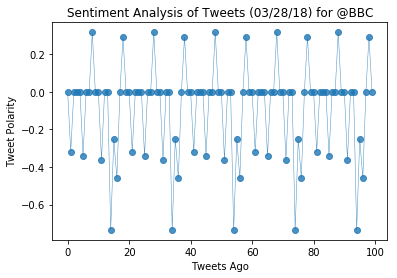

In [9]:
# Create plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment, and +1 the most positive sentiment
# Each plot point will reflect the compound sentiment of a tweet.
# Sort each plot point by its relative timestamp.
plt.plot(np.arange(len(sentiments_df["Compound"])),
         sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()